In this chapter, we’ll cover logistic regression. First we'll import the same libraries that we did in Chapter 1.

Source: https://medium.com/a-coders-guide-to-ai/a-coders-guide-to-neural-networks-chapter-2-logistic-regression-448d24653c24

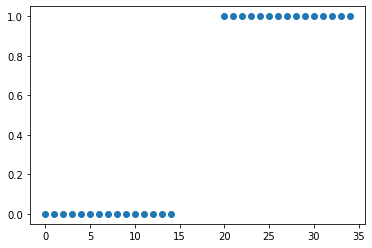

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import time
# Preparing mock data again
X = np.concatenate((np.arange(15, dtype=float), np.arange(20, 35, dtype=float)), axis=0) # Some integers 
y = np.concatenate((np.zeros(15, dtype=float), np.ones(15, dtype=float)), axis=0) #Just a bunch of zeros and ones

plt.scatter(X, y)

Good choice here would be to use Sigmoid Function to fit this data.

In [ ]:
temp_X = np.arange(-20, 20, dtype=float)
slope, bias = 1, 0
linear_eqn = slope*temp_X+bias
sigmoid_eqn = 1/(1+np.exp(-linear_eqn))
plt.plot(temp_X, sigmoid_eqn)
plt.show()

We could use MSE, like we did in linear regression, but that calculates the residuals (i.e., the distance between our best fit line and the actual points). That won’t make sense for logistic regression’s case. For logistic regression, we do care about is how many points on the graph are correctly classified.

In this case, we will use log loss or binary cross entropy (BCE)

In [ ]:
def BCE(y, y_pred): ##log loss error (binary cross entropy)
    return -np.sum((y*np.log(y_pred) + (1-y)*np.log(1-y_pred)))/y.shape[0]

Now let's use the information to get the slope and bias for the sigmoid function

<Figure size 432x288 with 0 Axes>

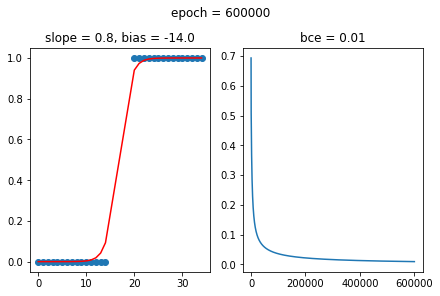

In [ ]:
epoch_loss = []

slope = 0.
bias = 0.
learning_rate = 1e-4
n = X.shape[0]

for epoch in range(600000+1):
    linear = slope*X + bias
    y_pred = 1/(1+np.exp(-linear)) ##logistic function
    loss = BCE(y, y_pred)
    epoch_loss.append(loss)


    if(epoch%50000 == 0):
        ######demo purpose only#####
        display.display(plt.gcf())
        display.clear_output(wait=True)
        ##########plotting##########
        fig, (ax0, ax1) = plt.subplots(ncols=2, constrained_layout=True)
        fig.suptitle('epoch = {0}'.format(epoch))
        ax0.scatter(X, y)
        ax0.plot(X, y_pred, 'r')
        ax0.set_title('slope = {0:.1f}, bias = {1:.1f}'.format(slope, bias))
        ax1.set_title('bce = {0:.2f}'.format(loss))
        ax1.plot(epoch_loss)
        plt.show()
        time.sleep(1)
        ############################
    
    ###slope and bias derivatives with respect to loss###
    dLoss_dLogistic = (-y/y_pred) + ((1-y)/(1-y_pred))
    dLogistic_dLinear = y_pred*(1-y_pred)
    dLinear_dSlope = X
    ##computational graph
    dLoss_dSlope = -np.sum(dLoss_dLogistic * dLogistic_dLinear * dLinear_dSlope) 
    dLoss_dBias = -np.sum(dLoss_dLogistic * dLogistic_dLinear)

    slope += learning_rate * dLoss_dSlope
    bias += learning_rate * dLoss_dBias